# Parameter sparce used for the Maxwell-bloch equations w/ phase modulation.

***

## Equations:

Maxwell-bloch equation, after aproximations, with external phase modulation for $E_y$

$
\begin{cases}
\partial_{\tau} E_x=-k E_x + \mu P_x \\
\partial_{\tau} E_y=-k E_y + \mu P_y + i.(\Delta \phi_0 + m.cos(w_{mod}.\tau)).E_x \\
\partial_{\tau} P_{x,y}=-(1+i\delta)P_{x,y}+E_{x,y}.D \\
\partial_{\tau} D=-\gamma_{||}(D-D_0+\tfrac{1}{2}(E^*_{x,y}P_{x,y}+E_{x,y}P^*_{x,y})) \\
\end{cases}
$


with $ E_{x,y}$ and $P_{x,y}$  $\in \mathbb{C}$

##### Normalizations made: 
$\tau= \gamma_{\bot}.t$, $k=\tfrac{\bar{k}}{\gamma_{\bot}}$,  $\gamma_{\parallel}=\tfrac{\bar{\gamma_{\parallel}}}{\gamma_{\bot}}$, $\eta=\tfrac{z}{L}$, $\delta'_{ac}=\tfrac{w_a-w_0}{\gamma_{\bot}}$


##### Aproximations: 

1-$k,\gamma_{\parallel}<<\gamma_{\bot}$   -- Homogenously broadened laser linewidth $ \nabla^2 E-\frac{1}{c^2}\partial_{t^2}E=\alpha \partial_{t^2}E$

2-Plane wave: $\nabla^2_{\bot}=0$

3-Two level medium

4-Slowly varying amplitud

5-Unidirectional field

6-Rotating wave approx $\partial_{t^2}<<\partial_t$

7-Single longitudinal mode

8-$g'->0$, $R_0->1$  -- Uniform field limit

9-$m$,$w_{mod}<<1$, $w_{mod}<<\gamma_{\bot}$  ..chequear..

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 24 17:05:30 2015

@author: Alexis
"""
import numpy as np
#import scipy as sc
#import matplotlib
import matplotlib.pyplot as plt
#from scipy.integrate import odeint
#from numpy import linspace
#import math
#from matplotlib.collections import LineCollection
from comparefase import comparembfase
from intmbfase import intmbfase as int
#import datetime as dt
from time import localtime
#import time, sys
#import mpld3

'''---- |2>
    ||
    || R21
    ||
   ---- |1>'''

plt.ion()
pi=np.pi #defino pi


### Parameters

In [3]:
'''parameters for normalization'''
a=2
gperp=10**8. #gamma perpendicular, loss rate
scale=1*(10.**6)/gperp #scale to micro seconds
wscale=1000*gperp/(10.**6)#scale frequency to khz

In [4]:
'''parameters for the equation'''
k=0.9*10.**7/gperp #normalized loss rate
mu=.25*10**(-4) #g
Dphi0=0.0 #phase shift [-pi,pi]
d=1.0 #detuning
g=2.5*10.**4/gperp #*((2*pi)**2) #sigma parallel, normalized loss rate
D0=a*k/mu #Poblation
m=.02 #modulation amplitud [0,1]

'''parameters to compare with the results'''
w_res=np.sqrt(k*g*((D0*mu/k)-1.))*wscale #resonance frequency
a=D0*mu/k
w=np.sqrt(k*g*(a-1.)-(g*g*a*a)/4)*wscale #Relaxation oscilations frequency


swiping parameter: wf


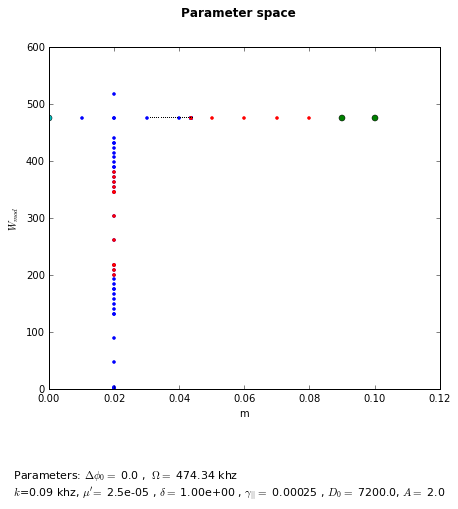

In [8]:
'''w Swipe 30/12/15 parameters'''
wfn1=np.arange(0.00047434, 0.0047434+0.00047434, (0.0047434-0.00047434)/10)*wscale #10 pasos entre la resonancia y 0.1*resonancia
mn1=.02*np.ones(len(wfn1))
param1=[mn1 , wfn1]

'''Lower w Swipe 31/12/15 parameters'''
wfmin=0.001328152
wfmax=0.002181964
wfn2=np.arange(wfmin, wfmax+(wfmax-wfmin)/10. , (wfmax-wfmin)/10.)*wscale #10 pasos entre la resonancia y 0.1*resonancia
mn2=.02*np.ones(len(wfn2))
param2=[mn2 , wfn2]

'''Upper w Swipe 31/12/15 parameters'''
wfmin=0.0034627
wfmax=0.0043165
wfn3=np.arange(wfmin, wfmax+(wfmax-wfmin)/10. , (wfmax-wfmin)/10.)*wscale #10 pasos entre la resonancia y 0.1*resonancia
mn3=.02*np.ones(len(wfn3))
param3=[mn3 , wfn3]

'''m Swipe 31/12/15 parameters'''
mmin=0.0
mmax=0.1
mn4=np.arange(mmin, mmax+(mmax-mmin)/10. , (mmax-mmin)/10.) #10 pasos entre la resonancia y 0.1*resonancia
wfn4=wf=0.00474342*wscale*np.ones(len(mn4))
param4=[mn4 , wfn4]

'''m Swipe 1/1/16 parameters'''
mmin=0.04
mmax=0.05
mn5=np.arange(mmin, mmax+(mmax-mmin)/10. , (mmax-mmin)/10.) #10 pasos entre la resonancia y 0.1*resonancia
wfn5=wf=0.00474342*wscale*np.ones(len(mn5))
param5=[mn5 , wfn5]

mmin=0.0436
mmax=0.0437
mn6=np.arange(mmin, mmax+(mmax-mmin)/10. , (mmax-mmin)/10.) #10 pasos entre la resonancia y 0.1*resonancia
wfn6=wf=0.00474342*wscale*np.ones(len(mn6))
param6=[mn6 , wfn6]

mmin=0.04
mmax=0.05
mn=np.arange(0., 1+(1)/60. , 1/60.) #n evenly paced steps between 0 and 1.
steep=1.
plt.plot(mn,np.arctan(steep*mn),'.b')
mn=np.arctan(steep*mn) #non linear distribution of parameter
mn=((mmax-mmin)/(pi/2)*mn+mmin) #normalize to the min  and max values i want to use


'''m swipe 5/1/16'''
mmin=0.031
mmax=0.044
mn7=np.arange(mmin, mmax+(mmax-mmin)/20. , (mmax-mmin)/20.)
wfn7=wf=0.00474342*wscale*np.ones(len(mn7))
param7=[mn7 , wfn7]

'''m swipe bif 5/1/16'''
mmin=0.01
mmax=0.046
mn=np.arange(0., 1+(1)/30. , 1/30.) #n evenly paced steps between 0 and 1.
steep=10.
plt.plot(mn,np.arctan(steep*mn),'.b')
mn=np.arctan(steep*mn) #non linear distribution of parameter
mn8=((mmax-mmin)/(pi/2)*mn+mmin) #normalize to the min  and max values i want to use
wfn8=wf=0.00474342*wscale*np.ones(len(mn8))
param8=[mn8 , wfn8]

'''plots'''
save=False #set True if i want to save files automatically
%matplotlib inline

fig=plt.figure()
fig.suptitle('Parameter space', fontsize=12, fontweight='bold')
ax2 = fig.add_subplot(111)
plt.plot(param1[0],param1[1], '.b' , label='Swipe 30/12')
plt.plot(param2[0],param2[1], '.b' , label='Swipe 31/12')
plt.plot(param3[0],param3[1], '.b' , label='Swipe 31/12')
plt.plot(param6[0][0:8],param6[1][0:8], '.b', label='Swipe 1/1')
plt.plot(param6[0][-1],param6[1][-1], '.b' , label='Swipe 1/1')
plt.plot(param4[0][1:5],param4[1][1:5], '.b' , label='Swipe 31/12')
plt.plot(param4[0][0],param4[1][0], 'oc' , label='Swipe 31/12 no oscilation')
plt.plot(param1[0][4:8],param1[1][4:8], '.r' , label='Swipe 30/12 Chaos')
plt.plot(param2[0][8:],param2[1][8:], '.r' , label='Swipe 31/12 Chaos')
plt.plot(param3[0][:5],param3[1][:5], '.r' , label='Swipe 31/12 Chaos')
plt.plot(param4[0][5:9],param4[1][5:9], '.r' , label='Swipe 31/12 Chaos')
plt.plot(param6[0][8:10],param6[1][8:10], '.r' , label='Swipe 1/1 Chaos')
plt.plot(param1[0][8],param1[1][8], 'r' , label='Swipe 30/12 dudoso')
plt.plot(param3[0][6],param3[1][6], 'r' , label='Swipe 31/12 dudoso')
plt.plot(param4[0][9:],param4[1][9:], 'og' , label='Swipe 31/12 dudoso')
plt.plot(param7[0],param7[1], ',k' , label='Swipe 31/12')
plt.plot(param7[0],param7[1], ',k' , label='Swipe 31/12')
plt.plot(0.02,3.734, '.b' )
plt.plot(0.02,2.734, '.b' )
plt.plot(0.02,1.734, '.b' )
ax2.set_xlabel('m')
ax2.set_ylabel('$W_{mod}$')
plt.text(-0.1,-.32, "\n Parameters: $\Delta \phi_0=$ %s ,  $\Omega=$ %.2f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f " % (Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax2.transAxes)   
plt.subplots_adjust(bottom=0.22)
#plt.legend()
fig.set_size_inches(7, 7)
if save==True: 
    fname='%d_%d_%d-%d.%d.%d-parameter_space.png' % localtime()[0:6]
    fig.savefig(fname, dpi = 100)# when saving, specify the DPI


In [9]:
print mn

[ 0.          0.32175055  0.5880026   0.78539816  0.92729522  1.03037683
  1.10714872  1.16590454  1.21202566  1.24904577  1.27933953  1.30454428
  1.32581766  1.34399748  1.35970299  1.37340077  1.38544838  1.39612413
  1.40564765  1.41419445  1.42190638  1.42889927  1.43526861  1.44109379
  1.44644133  1.4513674   1.45591972  1.46013911  1.46406065  1.46771472
  1.47112767  1.47432255]


## Initial conditions, Integration and variables

In [10]:
'''30/12'''
timeinit = np.arange(0., intime, 0.5)
dfxinit=[0., 1.] 
dfyinit=[-2.,  -1.9]  
drxinit=[-3.,   1.]
dryinit=[-9.34720367e+02 ,  7.31585718e+02]
ddeltainit=[6.65973518e+03]
yinit=np.array(dfxinit+dfyinit+drxinit+dryinit+ddeltainit)
 

'''31/12'''
timeinit = np.arange(0., intime, 0.5)
dfxinit=[1., 1.] 
dfyinit=[1.,  -1.9]  
drxinit=[1.,   1.]
dryinit=[1.,  -1.9] 
ddeltainit=[6.65973518e+03]
yinit=np.array(dfxinit+dfyinit+drxinit+dryinit+ddeltainit)



NameError: name 'intime' is not defined

Notebook style:

In [ ]:
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())

a hacer:
    
    - barrido en frecuencia hacia la resonancia.
    - barrido en m, en la frecuencia de resonancia.
    - mapa de parametros usados